In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [4]:
df['user_id'].unique().shape[0]

290584

**d.** The proportion of users converted.

In [5]:
df[df['converted']==1].shape[0]/df.shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
index_list=[]
index_list.extend(df[(df['landing_page']=='old_page')&(df['group']!='control')].index)
index_list.extend(df[(df['landing_page']=='new_page')&(df['group']!='treatment')].index)
len(index_list)

3893

**f.** Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
index_list_2=[]
index_list_2.extend(df[(df['landing_page']=='old_page')&(df['group']!='control')].index)
index_list_2.extend(df[(df['landing_page']=='new_page')&(df['group']!='treatment')].index)
df2=df.drop(index_list,axis=0)

In [9]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].unique().shape[0]

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df[df['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
df2=df2.drop(1899)

In [14]:
df2[df2['converted']==1].shape[0]/df2.shape[0]

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control= df2[df2['group']=='control']
group1=control[control['converted']==1].shape[0]/control.shape[0]
group1

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment= df2[df2['group']=='treatment']
group2=treatment[treatment['converted']==1].shape[0]/treatment.shape[0]
group2

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=group2-group1
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
p_new_page=df2[(df2['landing_page']=='new_page')].shape[0]/df2.shape[0]
p_new_page

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**as we can see the propability of conversion for the new page is not as good as the old one 
though the new one has been displayed more times than the old<br>
but we still not having a statistical evidence upon our hypothesis testing 
**

<a id='ab_test'></a>
## Part II - A/B Test

### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

> H0: **$P_{old} >= P_{new}$** <br>
H1: **$P_{old} < P_{new}$**

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new=df2[df2['converted']==1].shape[0]/df2.shape[0]
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old=df2[df2['converted']==1].shape[0]/df2.shape[0]
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
df_new=df2[df2['landing_page']=='new_page']
n_new=df_new.shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
df_old=df2[df2['landing_page']=='old_page']
n_old=df_old.shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
np.random.seed(42)
random1=np.random.choice(df2['converted'],n_new).mean()

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
np.random.seed(42)
random2=np.random.choice(df2['converted'],n_old).mean()

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
diff_random=random1-random2
diff_random

-8.9051678469342921e-06


**h. Sampling distribution** <br>

In [26]:
np.random.seed(42)
p_diffs = []

for _ in range(10000):
    new_page_c = np.random.binomial(1,p_new,n_new).mean()
    old_page_c = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_c - old_page_c)


In [27]:
p_diffs=np.array(p_diffs)
print(p_diffs.mean())

-1.16011005758e-05


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
p_value = (p_diffs > obs_diff).mean()
print(p_value)

0.9009


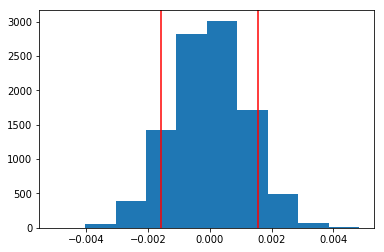

In [29]:
plt.hist(p_diffs)
plt.axvline(obs_diff,c='red')
plt.axvline(p_diffs.mean() + (p_diffs.mean() - obs_diff),c='red')

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>the value here is the p-value and because it's above the alpha ratio of 0.05 type 1 error rate
we can say we can't reject the null-hypothesis
which means $P_{old}>=P_{new}$ hypothesis can't be rejected

In [30]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[df2['landing_page']=='old_page']['converted'].sum()

# number of conversions with the new_page
convert_new = df2[df2['landing_page']=='new_page']['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page']=='new_page'].shape[0]

# number of individuals who received new_page
n_new = df2[df2['landing_page']=='old_page'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
from statsmodels.stats.proportion import proportions_ztest
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='two-sided')
print(z_score, p_value)

1.26169574219 0.207058289607


In [32]:
from statsmodels.stats.proportion import proportions_ztest
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')
print(z_score, p_value)

1.26169574219 0.896470855197


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

> it's p_value is approximately the same as our calculations which means we still can't reject the null hypothesis and <br>
z_score is below the critical value of 1.960 which ensure our calculation <br> 
i have made the test with two different method <br>
for one sided : it's approximately the same <br>
for two-sided : it's different from our calculation that there is no correlation between the landing page type <br> and the conversion rate <br>

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**logistic regression because it's either 1 or 0.**

In [33]:
df2['intercept']=1

In [34]:
df2[['un_ab_page','ab_page']]=pd.get_dummies(df2['group'])


In [35]:
df2.drop(columns=['un_ab_page'],inplace=True)

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [37]:
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-25 16:47 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

>**the previous p_value is slightly lower than the statesmodel calculation by about (0.2) but it's the same as that i mannually calculated
the null hypothesis is that ab_page which means the new page or treatment =1 converted =0 and the alternative one 
is convert=1 when treatment =1<br>
because the p-value obtained in the previous calculation a one-tailed test. while the test implied by the regression model is a two tailed test<br>
our hypothesis was H0: $P_{old}>=P_{new}$ <br>
but in the regression model was <br>
H0: $P_{old}=P_{new}$

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**additional items doesn't mean more value of the adjusted-R-score because these features may be dependent on each other or having what is called multicolliniarity or autocorrelation**

In [39]:
# Read the countries.csv
df_countries=pd.read_csv('countries.csv')
df_all=pd.merge(left=df2,right=df_countries,on='user_id',how='inner')

In [40]:
# Join with the df2 dataframe
df_all[['CA','UK','US']]=pd.get_dummies(df_all['country'])

In [41]:
df_all.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [42]:
model2=sm.Logit(df_all['converted'],df_all[['intercept','ab_page','CA','UK']]).fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [43]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-25 16:47 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

>**i have but my base line as (US) for the dummy variables <br>
CA is below the line by np.exp(-0.0408)<br>
and UK is above the line by np.exp(0.0099)<br>
if we look at the p-values we can say we don't have evidence to reject the null hypothesis which means staying with old page would be more accurate since we aren't stastically signifficant there would a difference**

In [44]:
df_all['UK_ab_page'] = df_all['UK'] * df_all['ab_page']
df_all['US_ab_page'] = df_all['US'] * df_all['ab_page']
df_all['CA_ab_page'] = df_all['CA'] * df_all['ab_page']

In [48]:
model3=sm.Logit(df_all['converted'],df_all[['intercept','UK','CA','ab_page','UK_ab_page','CA_ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [49]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-25 16:48 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

## conclusion
> i have but my base line as US_ab_page to get the best result but <br>
CA is below the line by np.exp(-0.0644)<br>
and UK is above the line by np.exp(0.0257)<br>
and because the p-value is still above the alpha ratio of maximum type 1 error <br>
we can't reject the null hypothesis <br>
Thus, the conversion of landing_page in the UK doesn't  concretely differ from other countries<br>
And the Conversion of landing_page in CA doesn't concretely differ from the others

##### therefore as conclusion we can't say the new page made a concrete  difference in the conversion rate and building a new page would be better 

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0